In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets._samples_generator import make_regression
X, Y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=6, bias=30, random_state=200)

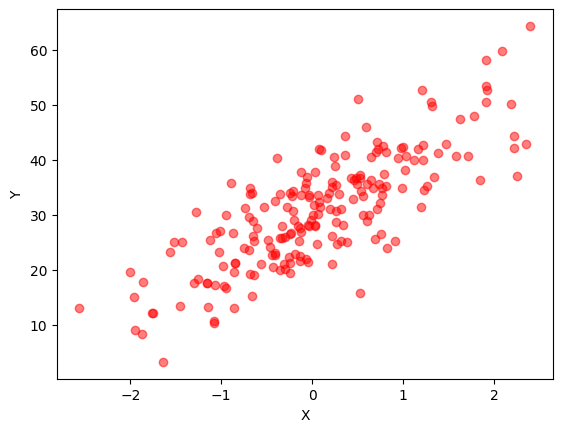

In [3]:
from matplotlib import pyplot as plt
plt.scatter(X, Y, c= "red", alpha=.5, marker= 'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [4]:
def mean_squared_error(y_true, y_predicted):
    # Calculate the mean squared error
    cost = np.sum((y_predicted - y_true) ** 2) / len(y_true)
    return cost

In [5]:
def linear_regression(X, y, learning_rate=0.01, num_iterations=2000, stopping_threshold=1e-6, verbose=True):
    # Initialize weights and bias
#    weights = np.zeros((X.shape[1], 1))
    weights = 0
    bias = 0
    curr_cost = 0
    prev_cost = 0
    
    # Number of samples
    m = len(y)
    
    # Gradient Descent
    for i in range(num_iterations):

        y_pred = np.dot(X, weights) + bias
        curr_cost = mean_squared_error(y, y_pred)
        
        if i>0 and abs(prev_cost - curr_cost) <= stopping_threshold:
            break
        
        if i>0 and curr_cost > prev_cost:
            if verbose: print("Learning rate too large....Objective function is increasing....\nReducing learning rate....")
            learning_rate = learning_rate*0.5
        prev_cost = curr_cost
        
        
        # Calculate gradients
        dW = (2/m) * np.dot(X.T, (y_pred - y))
        db = (2/m) * np.sum(y_pred - y)
        
        # Update weights and bias
        weights -= learning_rate * dW
        bias -= learning_rate * db
        
        if verbose:
            print(f"Iteration {i}: Cost {curr_cost}  Weigths: {weights}  Bias: {bias}")
    
    return weights, bias

In [6]:
# Reshape x to (200, 1)
X = X.reshape(-1, 1)
# Reshape y to (200, 1)
Y = Y.reshape(-1, 1)

# Estimate weight and bias using gradient descent
estimated_weight, estimated_bias = linear_regression(X, Y)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

# Make predictions using estimated parameters
Y_pred = estimated_weight * X + estimated_bias

mse = mean_squared_error(Y, Y_pred)
print(f"Mean Squared Error: {mse}")

Iteration 0: Cost 1059.713093327432  Weigths: [[0.20429525]]  Bias: 0.6176452279108391
Iteration 1: Cost 1017.8298430023402  Weigths: [[0.40387789]]  Bias: 1.2226350012885334
Iteration 2: Cost 977.6661773519521  Weigths: [[0.59885427]]  Bias: 1.8152294083349636
Iteration 3: Cost 939.1514007268191  Weigths: [[0.78932838]]  Bias: 2.3956831779883263
Iteration 4: Cost 902.2177272869096  Weigths: [[0.97540191]]  Bias: 2.964245790606797
Iteration 5: Cost 866.8001611160852  Weigths: [[1.15717426]]  Bias: 3.5211615863617296
Iteration 6: Cost 832.8363812800989  Weigths: [[1.33474265]]  Bias: 4.066669871387873
Iteration 7: Cost 800.2666316241239  Weigths: [[1.50820213]]  Bias: 4.6010050217371
Iteration 8: Cost 769.0336151142349  Weigths: [[1.67764562]]  Bias: 5.1243965851811675
Iteration 9: Cost 739.0823925353528  Weigths: [[1.84316399]]  Bias: 5.63706938090811
Iteration 10: Cost 710.360285365889  Weigths: [[2.00484608]]  Bias: 6.139243597155904
Iteration 11: Cost 682.816782656761  Weigths: [[2.

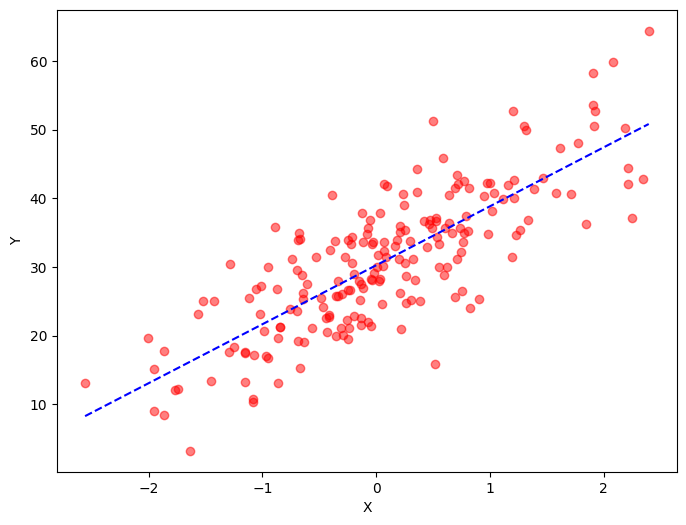

In [7]:
# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, marker='o', color='red', alpha=.5)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue', markerfacecolor='red',markersize=10, linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()